# Understanding the `raw image` to `pixelation`

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import datetime

### Loading the `MNIST` data

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist_dataset.load_data() #array

In [ ]:
x_train.shape

(60000, 28, 28)

![image.png](attachment:e969b33d-bf8b-4c7a-8177-1015dd7a9ca2.png)

![image.png](attachment:f2665ec4-bafe-4e02-994a-2b06181f41cb.png)

In [ ]:
### Let us show the very first digit image

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Plotting the `first image` as `GREYSCALE` image

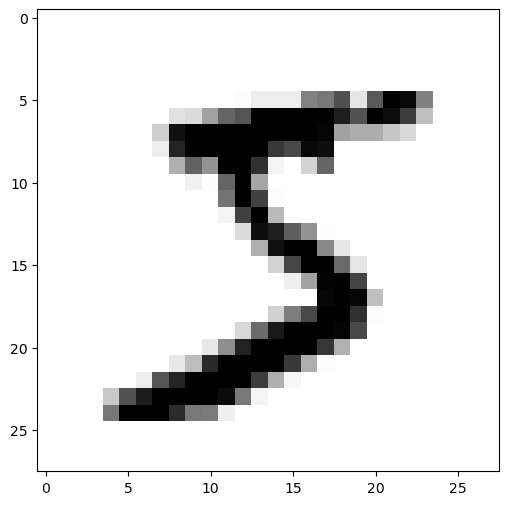

In [ ]:
plt.figure(figsize = (6,6))
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

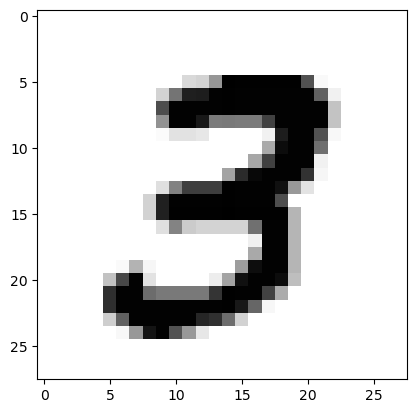

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train[7], cmap= plt.cm.binary)
plt.show()

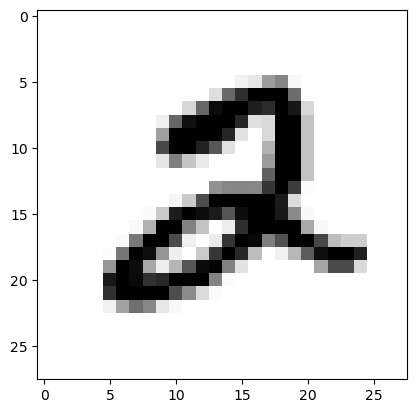

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train[5], cmap= plt.cm.binary)
plt.show()

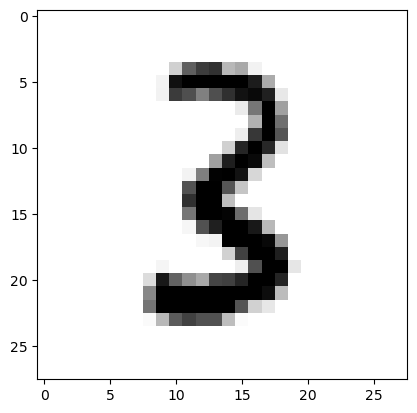

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train[50000], cmap= 'binary')
plt.show()

In [ ]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Course Structure.pdf',
 'Course Structure_07Jun.pdf',
 'Introduction to Deep Learning_07Jun.pdf',
 'Introduction to Deep Learning_08Jun.pdf',
 'Intro_to_ANN_08June.pdf',
 'Intro_to_NN_Architecture_08June.pdf',
 'Intro_to_Trainer.pdf',
 'number_8.png',
 'Setting up expectations & guidelines.pdf',
 'Understanding raw image to pixelation_14June.ipynb']

In [ ]:
### To get the current working directory
os.getcwd()

'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\07. AI and DL IITR-07Jun2025(M)'

In [ ]:
from PIL import Image # Pillow library

In [ ]:
image_path = r"C:\Users\think\OneDrive - Thinking Mojo\TSLC\Intellipaat\Session Master\07. AI and DL IITR-07Jun2025(M)\number_8.png"
img = Image.open(image_path)

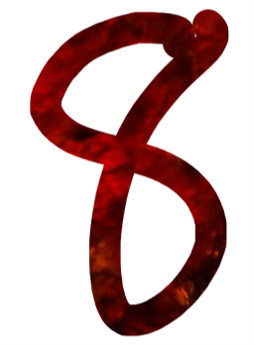

In [ ]:
img

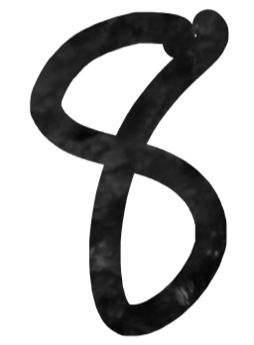

In [ ]:
### Convert the image to grayscale
img_gray = img.convert('L')
img_gray

In [ ]:
### Get the image size
width, height = img_gray.size
print('Width of the image:', width, 'px')
print('Height of the image:', height, 'px')

Width of the image: 254 px
Height of the image: 345 px


In [ ]:
### Convert the above grayscale image to 28 by 28 pixels
img_gray_resized = img_gray.resize((28,28))

In [ ]:
### Get the image size
width, height = img_gray_resized.size
print('Width of the resized-image:', width, 'px')
print('Height of the resized-image:', height, 'px')

Width of the resized-image: 28 px
Height of the resized-image: 28 px


In [ ]:
img_gray_resized

In [ ]:
### Convert the resized image into an array
img_gray_resized_array = np.array(img_gray_resized)

In [ ]:
type(img_gray_resized_array)

numpy.ndarray

In [ ]:
img_gray_resized_array.shape

(28, 28)

In [ ]:
img_gray_resized_array.ndim

2

In [ ]:
img_gray_resized_array

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 241, 232, 233, 237, 244, 255, 255, 254, 207, 212, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 229, 182, 131,
         81,  55,  48,  47,  49,  52,  80, 153, 133,  40,  43, 131, 251,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 253, 185,  96,  39,  24,  12,
         11,  12,  12,  16,  13,  18,  19,  19,  40,  42,  35,  26, 211,
        255, 255],
       [255, 255, 255, 255, 255, 255, 219,  91,  19,  19,  25,  21,  28,
         67, 109, 138, 139, 119,  29,  19,  22,  30,  34,  27,  46, 229,
        255, 255],
       [255, 255, 255, 255, 255, 189,  54,  29,  27,  26,  80, 155, 215,
        249, 255, 255, 255, 255, 156,  21,  22,  30,  24,  33, 175, 255,
        255, 255],
       [255, 255, 255, 255, 199,  44,  29,  28,  48, 175, 253, 255, 255,
        255, 255, 255, 255, 217,  82,  17,  13,  18,  69, 200, 255, 255,
        255, 255],
       [25

### Plotting the `pixelated grayscale` image as a **28** by **28** grid

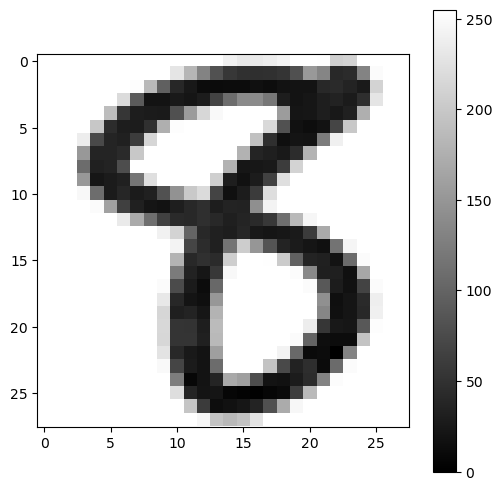

In [ ]:
plt.figure(figsize = (6,6))
plt.imshow(img_gray_resized_array, cmap = 'gray')
plt.colorbar()
plt.show()

## LIVE HANDWRITTEN DIGIT to PIXELATED CONVERTER APP

 `©APC`

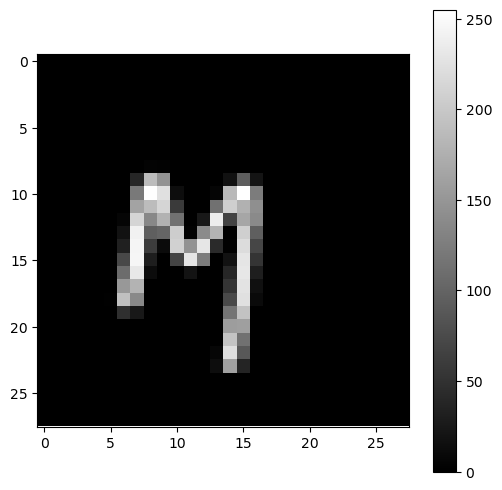

Grayscale Pixel Values (0-255):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

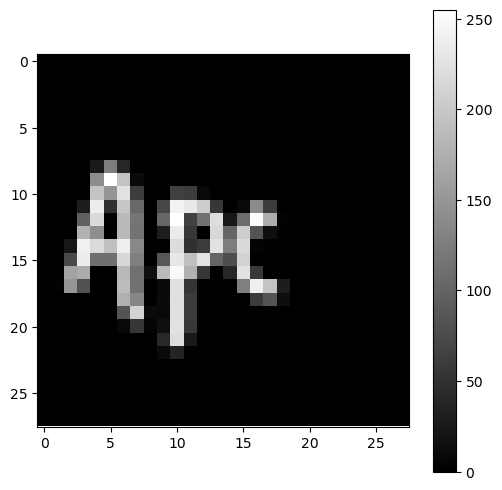

Grayscale Pixel Values (0-255):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  25 125  38   

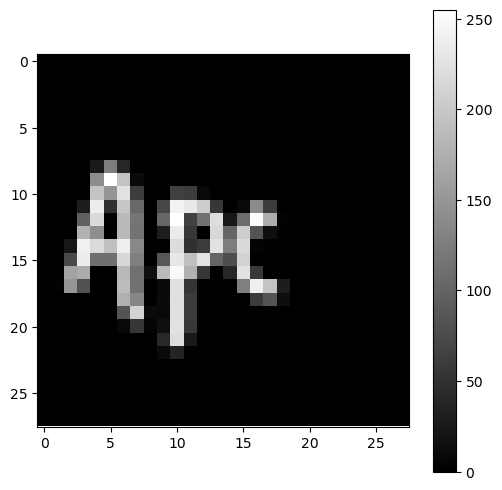

Grayscale Pixel Values (0-255):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  25 125  38   

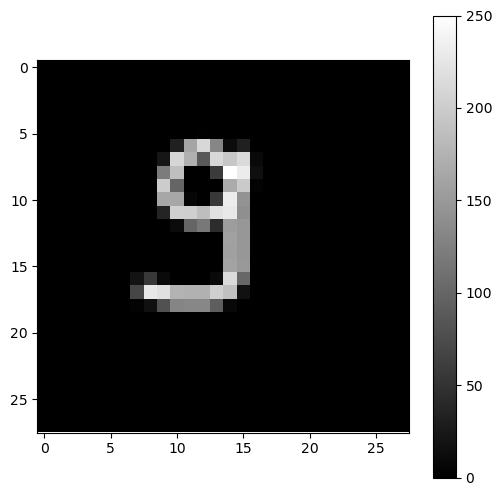

Grayscale Pixel Values (0-255):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  33 162 211 131  12  33   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  22 209 172  88 211 195 213   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

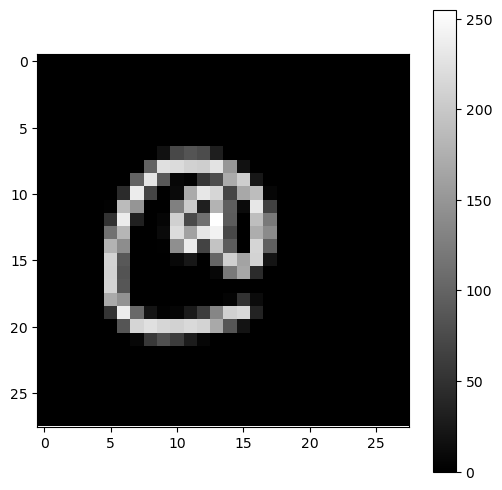

Grayscale Pixel Values (0-255):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  17  72  84  76  30   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

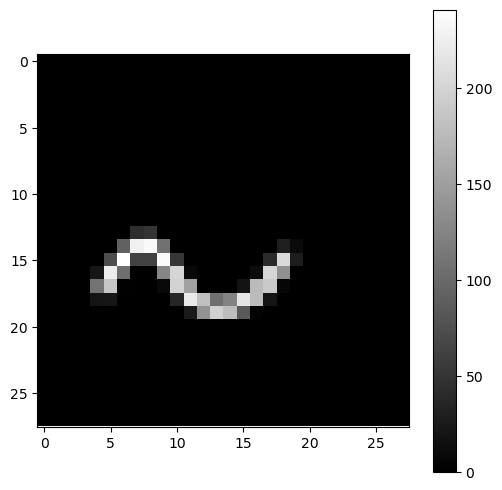

Grayscale Pixel Values (0-255):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

In [ ]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Tkinter window
window = tk.Tk()
window.title("Draw a Digit")

# Set the canvas size (bigger than 28x28 for easier drawing)
canvas_width = 200
canvas_height = 200

# Create a canvas widget
canvas = tk.Canvas(window, width=canvas_width, height=canvas_height, bg='white')
canvas.pack()

# Initialize PIL Image to capture drawing
img = Image.new("L", (canvas_width, canvas_height), color=255)  # 'L' mode for grayscale
draw = ImageDraw.Draw(img)

# Variable to track drawing
is_drawing = False

# Function to capture the drawing when mouse is pressed
def start_drawing(event):
    global is_drawing
    is_drawing = True
    canvas.old_coords = event.x, event.y

# Function to capture drawing as mouse moves
def draw_line(event):
    global is_drawing
    if is_drawing:
        x, y = event.x, event.y
        x1, y1 = canvas.old_coords
        # Draw on the canvas
        canvas.create_line(x1, y1, x, y, width=8, fill='black', capstyle=tk.ROUND, smooth=tk.TRUE)
        # Draw on the PIL image (for later conversion)
        draw.line([x1, y1, x, y], fill=0, width=8)
        canvas.old_coords = x, y

# Function to stop drawing
def stop_drawing(event):
    global is_drawing
    is_drawing = False

# Bind the functions to mouse events
canvas.bind('<ButtonPress-1>', start_drawing)
canvas.bind('<B1-Motion>', draw_line)
canvas.bind('<ButtonRelease-1>', stop_drawing)

# Function to clear the canvas
def clear_canvas():
    canvas.delete("all")
    draw.rectangle([0, 0, canvas_width, canvas_height], fill=255)

# Function to capture the canvas drawing, resize it to 28x28, and display it
def process_image():
    # Resize the captured image to 28x28 pixels
    img_resized = img.resize((28, 28))

    # Invert colors (since white background becomes 255, and black strokes become 0)
    img_inverted = ImageOps.invert(img_resized)

    # Convert the image to a NumPy array
    img_array = np.array(img_inverted)

    # Show the 28x28 image and pixel values
    plt.figure(figsize=(6, 6))
    plt.imshow(img_array, cmap='gray')
    plt.colorbar()
    plt.show()

    # Print the grayscale pixel values
    print("Grayscale Pixel Values (0-255):")
    print(img_array)

# Add buttons to clear the canvas and process the image
clear_button = tk.Button(window, text="Clear Canvas", command=clear_canvas)
clear_button.pack(side=tk.LEFT, padx=10, pady=10)

process_button = tk.Button(window, text="Process Image", command=process_image)
process_button.pack(side=tk.RIGHT, padx=10, pady=10)

# Run the Tkinter event loop
window.mainloop()
